# White Blood Cells

In [1]:
import pandas as pd
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\emili\Downloads\blood_data (1).csv")
print(df.head())

X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].astype(int)

        # 1         2         3         4         5         6         7  \
0  0.121075  0.912344  1.432111  1.540956  1.252333  0.957594  0.712998   
1  0.298066  0.830151  0.960709  1.000123  0.965636  0.819066  0.849858   
2  0.196923  1.666643  2.084505  1.855161  1.603003  1.678651  1.546568   
3  0.118606  0.361996  1.050160  1.639484  1.858165  1.370149  1.020508   
4  0.009170  1.609278  3.320568  2.427671  1.508411  0.986886  0.571958   

          8         9        10  ...        44        45        46        47  \
0  0.798607  1.170393  1.692606  ...  2.361702  2.289100  4.362529  1.868435   
1  0.950855  1.154082  1.129449  ...  3.327597  7.472283  2.543191  0.130734   
2  0.940188  0.393847  0.157298  ...  1.822071  5.098671  3.221859  0.107526   
3  0.775883  0.717815  0.668396  ...  1.717295  3.920698  7.626998  0.348129   
4  0.291137  0.153592  0.115767  ...  0.963990  2.088302  4.885723  4.324594   

         48         49        50        51        52   53  
0  0.087

In [12]:
# Initialization and training
n_neurons = 200
m_neurons = 200
som = MiniSom(n_neurons, m_neurons, X.shape[1], sigma=8, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0, topology='rectangular')

som.pca_weights_init(X)
som.train(X, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 5.440020369381393


In [13]:
target = Y
label_names = {
    1: "Basophils",
    2: "Neutrophils",
    3: "Eosinophils",
    4: "Erythroblasts",
    5: "Lymphocytes",
    6: "Monocytes",
}

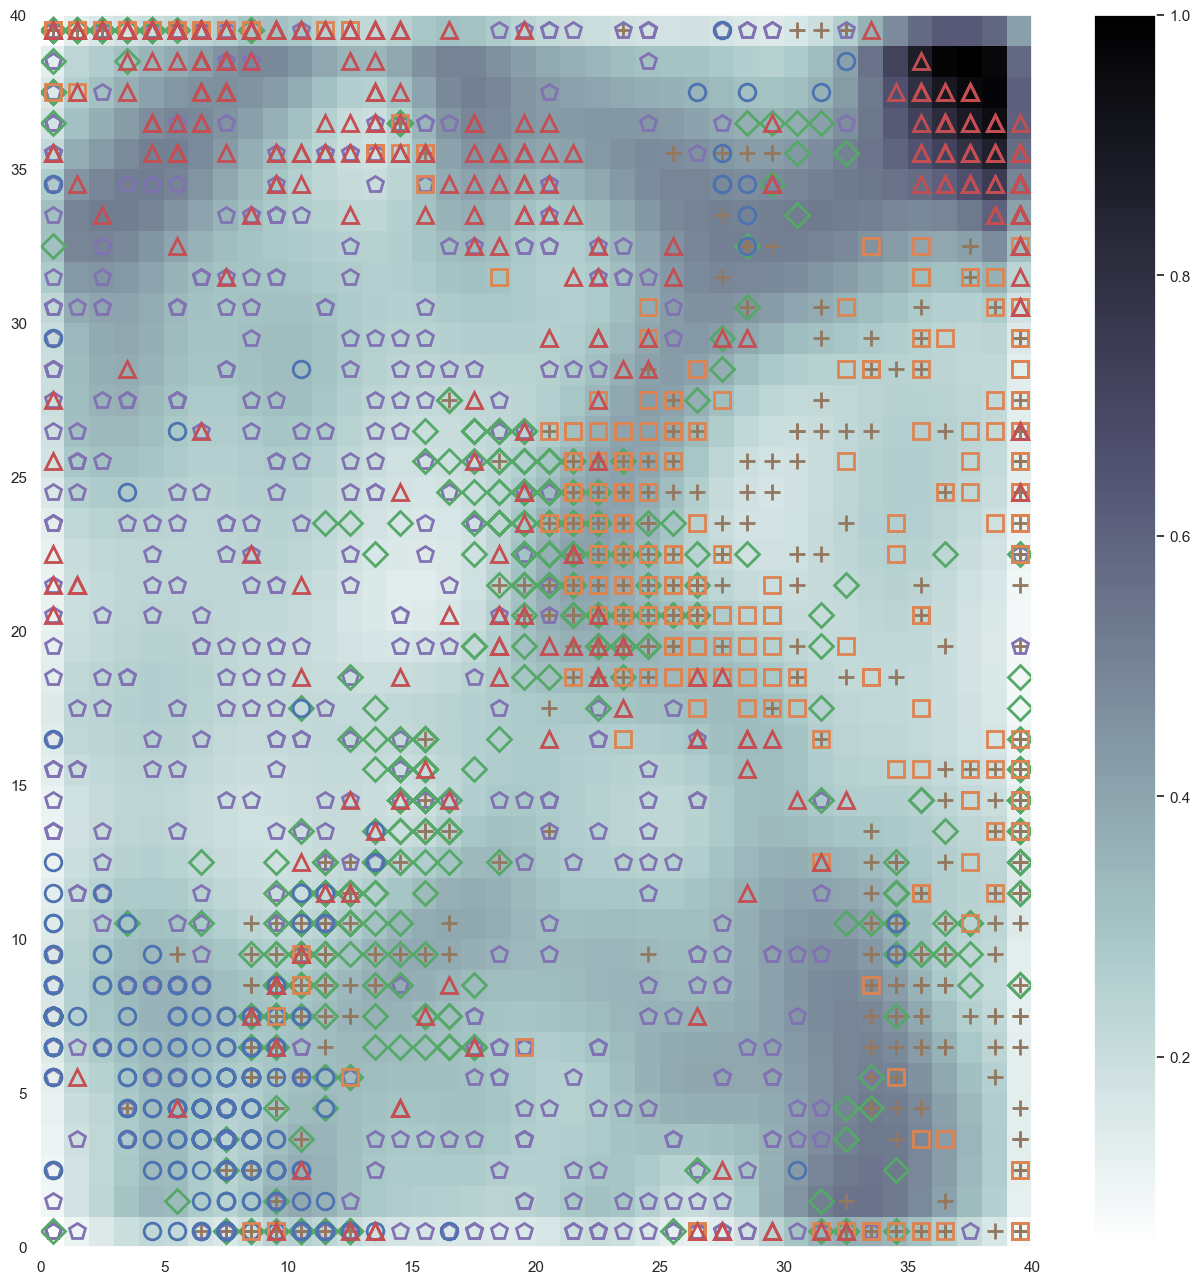

In [81]:
sns.set_theme()
plt.figure(figsize=(16, 16))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D', '^', 'p', '+']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

NameError: name 'colors' is not defined

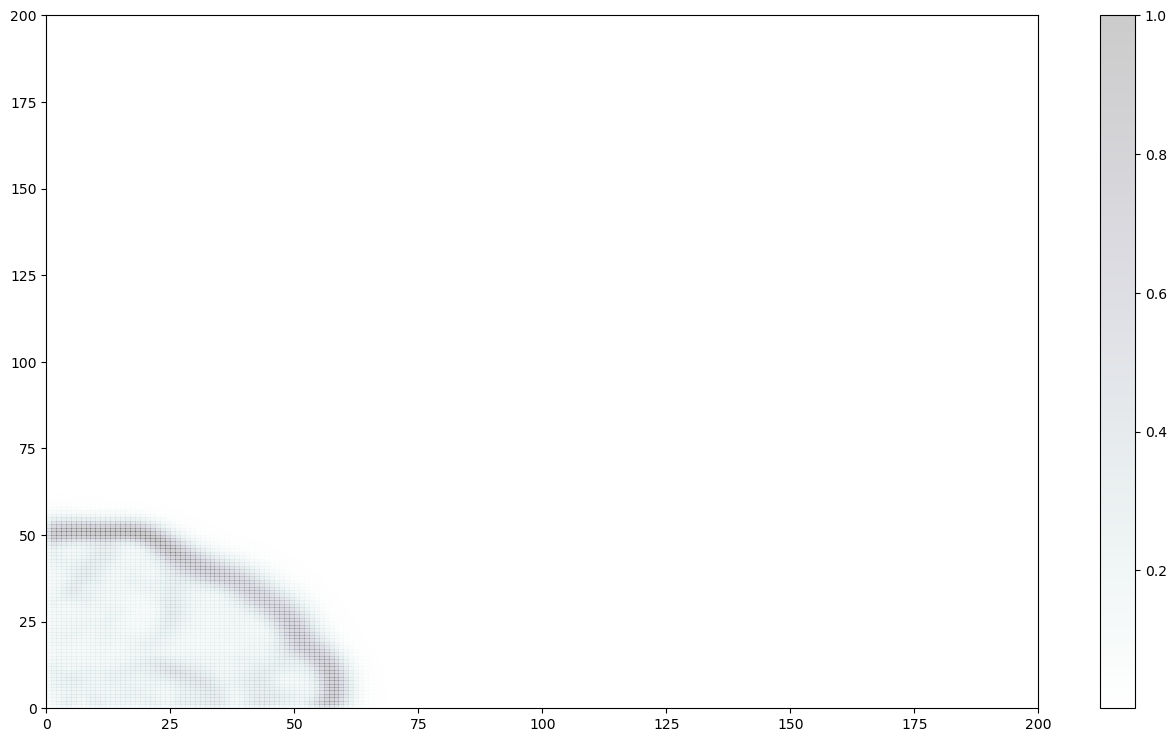

In [14]:
w_x, w_y = zip(*[som.winner(d) for d in X])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(16, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

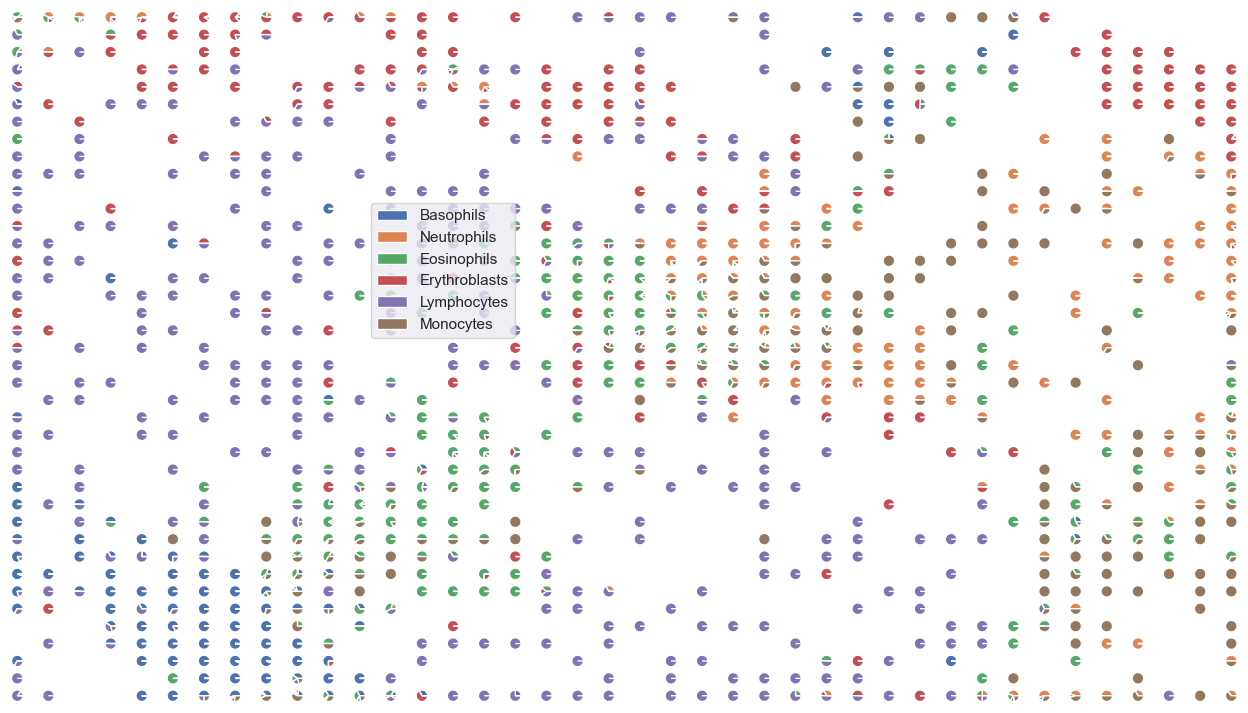

In [83]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(X, [label_names[t] for t in target])

fig = plt.figure(figsize=(16, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(1, 11), ncol=1)
plt.show()